<a href="https://colab.research.google.com/github/dushyant-dubey/dushyant-dubey.github.io/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_excel('Glass Nylon Data.xlsx')

In [16]:
display(df)

,Tensile Strain,Tensile Stress,Tensile Strain.1,Tensile Stress.1,Tensile Strain.2,Tensile Stress.2,Tensile Strain.3,Tensile Stress.3
0,0.000000e+00,-0.080483,0.000000e+00,-0.043090,0.000000e+00,-0.025643,0.000000e+00,-0.041538
1,-9.382925e-07,-0.079849,1.289511e-06,-0.051598,-1.012638e-06,-0.029867,-2.896913e-07,-0.044399
2,-8.075469e-07,-0.077785,9.639289e-07,-0.055801,6.178373e-07,-0.039365,3.178914e-07,-0.040575
3,-2.435459e-07,-0.075961,7.075649e-07,-0.055417,3.307096e-07,-0.026581,7.126922e-07,-0.037867
4,-5.614373e-07,-0.081122,1.038274e-06,-0.055593,4.691462e-07,-0.035872,1.128002e-07,-0.028093
...,...,...,...,...,...,...,...,...
13453,NaN,NaN,1.734858e+01,170.439292,NaN,NaN,NaN,NaN
13454,NaN,NaN,1.735214e+01,170.410889,NaN,NaN,NaN,NaN
13455,NaN,NaN,1.735481e+01,170.382558,NaN,NaN,NaN,NaN
13456,NaN,NaN,1.735881e+01,170.354263,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving consola.ttf to consola.ttf


In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'consola.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Consolas'

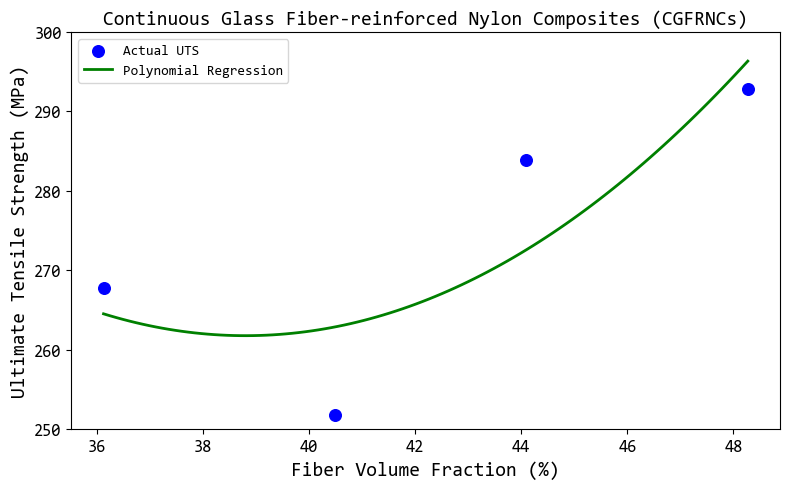

In [15]:
fiber_volumes = [48.27, 44.10, 40.49, 36.13]
stress_columns = ["Tensile Stress", "Tensile Stress.1", "Tensile Stress.2", "Tensile Stress.3"]
uts_values = [df[col].max() for col in stress_columns]
X = np.array(fiber_volumes).reshape(-1, 1)
y = np.array(uts_values)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.figure(figsize=(8, 5))
plt.scatter(fiber_volumes, y, color='blue', label="Actual UTS", s=70)
X_curve = np.linspace(min(fiber_volumes), max(fiber_volumes), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve_pred = model.predict(X_curve_poly)
plt.plot(X_curve, y_curve_pred, color='green', label="Polynomial Regression", linewidth=2)
plt.xlabel("Fiber Volume Fraction (%)", fontsize=14, fontweight='bold', fontname='Consolas')
plt.ylabel("Ultimate Tensile Strength (MPa)", fontsize=14, fontweight='bold', fontname='Consolas')
plt.title("Continuous Glass Fiber-reinforced Nylon Composites (CGFRNCs)", fontsize=14, fontweight='bold', fontname='Consolas')
plt.xticks(fontsize=12, fontweight='bold', fontname='Consolas')
plt.yticks(fontsize=12, fontweight='bold', fontname='Consolas')
plt.legend(fontsize=14, prop={'family': 'Consolas'})
plt.ylim(250, 300)
plt.tight_layout()
plt.show()

In [9]:
coefs = model.coef_
intercept = model.intercept_
print(f"Model: y = {intercept:.4f} + ({coefs[1]:.4f})·x + ({coefs[2]:.4f})·x²")

Model: y = 842.2291 + (-29.9201)·x + (0.3856)·x²


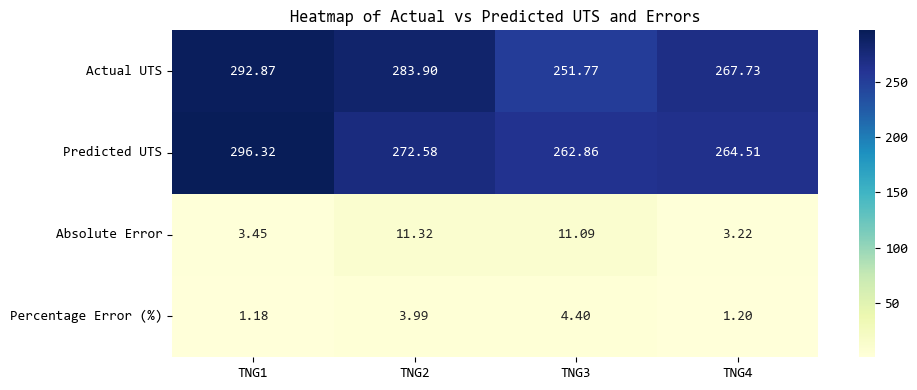

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
labels = ['TNG1', 'TNG2', 'TNG3', 'TNG4']
actual = np.array(y)
predicted = model.predict(poly.transform(X))
errors = actual - predicted
percentage_errors = (errors / actual) * 100
df_heatmap = pd.DataFrame({
    'Actual UTS': actual,
    'Predicted UTS': predicted,
    'Absolute Error': np.abs(errors),
    'Percentage Error (%)': np.abs(percentage_errors)
}, index=labels)
plt.figure(figsize=(10, 4))
sns.heatmap(df_heatmap.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Actual vs Predicted UTS and Errors")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()